<a href="https://colab.research.google.com/github/moulikatou/Ter_securite_Alimentaire_Miashs/blob/vmelancon/rCSI_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# rCSI Prediction

In this notebook we'll try to train a model to try and predict the rCSI index in Burkina Faso. We will first gather some features to fit the model on, then we'll see how those features could explain an rCSI variability in time and in space. So let's begin !

## Imports / Global Variables

In [2]:
!pip3 install unidecode
import unidecode

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive 
drive.mount("/content/gdrive")

PATH = "/content/gdrive/MyDrive/COLAB_STUFF/donnees/"
y_filename = "reduced_named_data.csv"
X_filename = ["matriceXY_Precipitation.csv", "MatriceXY_dataMais.csv"]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Gathering

The first thing to do will be to load data, format the explanatory variables to be easely merged by province. And finally merge the differents DataFrames to be one.

In [3]:
# This is the "main" dataframe with the rCSI and answers to the survey.
y_df = pd.read_csv(PATH + y_filename).iloc[:, 2:]
cols = ["VIL", "MEN", "YEAR"]
y_df[cols] = y_df[cols].astype(int)
y_df = y_df.rename(columns={"YEAR" : "ANNEE"})

print(y_df.shape)
y_df.head()

(25985, 11)


,PROV,COM,VIL,MEN,ANNEE,Q1,Q2,Q3,Q4,Q5,CSI
0,NAMENTENGA,BOALA,1,45,2017,0.0,0.0,0.0,0.0,0.0,0.0
1,NAMENTENGA,BOALA,1,58,2017,3.0,2.0,4.0,2.0,0.0,17.0
2,NAMENTENGA,BOALA,1,67,2017,0.0,0.0,0.0,0.0,0.0,0.0
3,NAMENTENGA,BOALA,1,75,2017,0.0,0.0,0.0,0.0,0.0,0.0
4,NAMENTENGA,BOALA,1,84,2017,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_dfs = [pd.read_csv(PATH + filename).iloc[:, 1:] for filename in X_filename] # We load every dataframe (unnecessary)

In [5]:
precipitations = X_dfs[0] # pd.read_csv(X_filename[0]).iloc[:, 1:]

try:
    del precipitations["RcsiMoyProv"]
except:
    pass
precipitations = precipitations.rename(columns={"ADM1_FR" : "REG", "ADM2_FR" : "PROV", "Année" : "ANNEE"})
precipitations["PROV"] = precipitations["PROV"].apply(lambda x : unidecode.unidecode(x.upper()))
precipitations["REG"] = precipitations["REG"].apply(lambda x : unidecode.unidecode(x.upper()))

precipitations.to_csv(PATH + "precipitations.csv")
print(len(precipitations.PROV.unique()))
precipitations

45


,REG,ADM1_PCODE,PROV,ADM2_PCODE,Preci_janvier_mean,Preci_janvier_min,Preci_janvier_max,Preci_fevrier_mean,Preci_fevrier_min,Preci_fevrier_max,Preci_mars_mean,Preci_mars_min,Preci_mars_max,Preci_avril_mean,Preci_avril_min,Preci_avril_max,Preci_mai_mean,Preci_mai_min,Preci_mai_max,Preci_juin_mean,Preci_juin_min,Preci_juin_max,Preci_juillet_mean,Preci_juillet_min,Preci_juillet_max,Preci_aout_mean,Preci_aout_min,Preci_aout_max,Preci_septembre_mean,Preci_septembre_min,Preci_septembre_max,Preci_octobre_mean,Preci_octobre_min,Preci_octobre_max,Preci_novembre_mean,Preci_novembre_min,Preci_novembre_max,Preci_decembre_mean,Preci_decembre_min,Preci_decembre_max,ANNEE
0,BOUCLE DU MOUHOUN,BF46,BALE,BF4601,0.895123,0.000000,1.040231,1.001181,0.616728,1.343220,9.523333,5.957644,17.382250,48.796281,37.748707,58.656685,109.199602,97.480064,119.457535,167.725002,156.914047,181.091324,252.297996,246.928986,262.001221,296.369484,282.773560,307.212494,155.322938,138.880219,168.172714,15.920349,14.383471,17.770554,3.789285,2.456811,5.557866,0.568468,0.353002,0.828910,2014
1,CENTRE-NORD,BF49,BAM,BF4901,0.109375,0.000000,1.000000,0.223958,0.000000,1.000000,2.333921,1.746255,4.111912,19.891068,11.262523,27.773399,50.791151,36.893196,66.137444,127.598660,99.636345,141.369675,217.486235,187.093918,244.460434,239.527905,215.697510,252.526215,101.301880,88.960663,114.385323,12.949035,11.263667,14.564628,0.570640,0.000000,1.000000,1.000000,1.000000,1.000000,2014
2,BOUCLE DU MOUHOUN,BF46,BANWA,BF4602,0.339588,0.000000,1.488208,1.461171,0.521126,1.949252,3.997883,2.571072,5.747647,29.311306,24.941317,34.665615,90.487470,82.896545,97.319786,175.530994,160.391861,183.575455,266.221875,246.155380,277.838867,276.688683,268.699005,295.294159,143.777325,123.788307,158.052704,21.455945,16.433945,26.704906,4.764787,2.177440,6.542110,1.509296,0.667497,2.314100,2014
3,CENTRE-SUD,BF51,BAZEGA,BF5101,0.000000,0.000000,0.000000,0.907997,0.700010,1.680727,9.450436,6.612926,14.617943,43.354781,35.308796,50.593292,94.079683,84.913246,102.673264,144.472180,135.819824,155.804947,260.421237,246.157242,274.659363,274.778534,265.286926,279.767303,130.207311,117.140663,141.587112,13.244244,12.238208,14.849860,1.190055,0.550620,1.765850,0.987993,0.630210,1.345117,2014
4,SUD-OUEST,BF57,BOUGOURIBA,BF5701,2.717166,1.709912,3.627472,1.697388,1.047621,2.561265,22.448071,16.613667,27.242189,53.546841,47.277435,57.877853,117.436442,108.583351,123.723640,165.165251,154.163330,170.622406,249.045711,241.879456,254.171265,284.064806,266.193268,300.148499,183.521020,175.643539,192.507919,21.996138,18.423113,28.447493,9.095707,5.485919,14.202320,0.777160,0.341059,1.064903,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,SAHEL,BF56,YAGHA,BF5604,0.000000,0.000000,0.000000,0.114007,0.000000,1.000000,2.472657,1.723278,3.272525,12.756782,6.703487,21.748665,31.651584,22.278521,40.927975,103.632518,88.321281,115.141457,155.466487,138.836716,169.372131,206.956324,190.885788,221.006393,131.667950,115.263069,147.500931,8.216859,6.067113,10.412515,0.944625,0.000000,1.000000,0.000000,0.000000,0.000000,2018
221,NORD,BF54,YATENGA,BF5403,0.000000,0.000000,0.000000,0.012292,0.000000,0.989102,1.807885,0.842420,3.789382,14.472554,8.318072,24.641951,48.152401,35.088348,69.584290,115.262039,93.140549,139.460785,216.067661,186.796738,250.309341,223.697138,203.304077,248.460129,87.955605,75.205811,102.253967,14.821808,11.880961,17.107590,0.546515,0.000000,1.000000,0.428125,0.000000,1.000000,2018
222,CENTRE-OUEST,BF50,ZIRO,BF5004,0.011501,0.000000,0.965833,1.302805,0.752650,1.686769,13.787027,9.460610,19.486679,52.027115,43.271828,60.887390,102.514971,96.886330,115.530197,151.041181,144.226288,156.078354,264.521778,254.044113,280.016266,283.598749,271.815521,297.254486,146.275954,135.901749,153.461182,13.343771,11.786141,16.446672,2.110892,1.215126,2.820248,1.191942,0.671488,1.697990,2018
22

In [6]:
mais = X_dfs[1] # pd.read_csv(X_filename[1]).iloc[:, 1:]

try:
    del mais["RcsiMoyProv"]
    # del mais["Region"]
except:
    pass
mais = mais.rename(columns={"REGION" : "REG", "PROVINCE" : "PROV", "COMMUNE" : "COM"})

mais.to_csv("mais.csv")
print(len(mais.PROV.unique()))
mais

45


,REG,PROV,COM,ANNEE,Sonagess_01mais-(t-0),Sonagess_02mais-(t-0),Sonagess_03mais-(t-0),Sonagess_04mais-(t-0),Sonagess_05mais-(t-0),Sonagess_06mais-(t-0),Sonagess_07mais-(t-0),Sonagess_08mais-(t-0),Sonagess_09mais-(t-0),Sonagess_10mais-(t-0),Sonagess_11mais-(t-0),Sonagess_12mais-(t-0)
0,BOUCLE DU MOUHOUN,BALE,BAGASSI,2014,104.840726,108.256734,99.388983,104.830742,99.085454,94.798132,96.862475,97.653481,104.737791,92.988742,86.203519,94.920836
1,BOUCLE DU MOUHOUN,BALE,BANA,2014,112.479671,111.664600,106.305087,113.098474,108.079178,106.271666,107.724837,111.586062,114.685928,100.033389,93.315756,99.961771
2,BOUCLE DU MOUHOUN,BALE,BOROMO,2014,106.788935,109.454099,102.288154,106.050591,106.158558,101.277340,102.339825,100.441724,106.443285,91.906695,86.523674,94.649666
3,BOUCLE DU MOUHOUN,BALE,FARA,2014,99.487754,101.147545,94.462890,98.755899,102.045788,98.264281,98.850299,93.851711,101.754563,86.974468,83.265693,89.510758
4,BOUCLE DU MOUHOUN,BALE,OURY,2014,110.594379,113.225762,106.901253,110.234317,109.679245,105.012713,105.998145,104.950970,109.337222,94.972882,89.658260,98.584088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,SUD OUEST,PONI,KAMPTI,2018,155.120321,161.682202,178.260912,176.601649,175.149855,177.714890,176.068332,176.068332,179.949467,173.274830,147.169155,141.111057
1751,SUD OUEST,PONI,LOROPENI,2018,154.465576,159.601607,174.612314,174.813158,173.670262,176.402042,175.932897,175.932897,178.890695,172.640239,144.402507,138.942052
1752,SUD OUEST,PONI,MALBA,2018,152.185385,155.712716,168.748263,170.603297,171.580698,177.157266,176.717496,176.717496,177.817357,165.958377,134.167658,132.985663
1753,SUD OUEST,PONI,NAKO,2018,149.986539,153.830502,165.302594,167.898378,169.330237,173.707341,175.384461,175.384461,176.208668,163.772298,132.528630,131.338124


In [7]:
X = mais.merge(precipitations, how="inner", on=["PROV", "ANNEE"])
print(len(X.PROV.unique()))


try:
    del X["REG"]
    del X["COM"]

except:
    pass

gb = X.groupby(["PROV", "ANNEE"]).mean()
X = pd.DataFrame(gb).reset_index()

X.to_csv(PATH + "dataX.csv")
print(len(X.PROV.unique()))
X

43
43


,PROV,ANNEE,Sonagess_01mais-(t-0),Sonagess_02mais-(t-0),Sonagess_03mais-(t-0),Sonagess_04mais-(t-0),Sonagess_05mais-(t-0),Sonagess_06mais-(t-0),Sonagess_07mais-(t-0),Sonagess_08mais-(t-0),Sonagess_09mais-(t-0),Sonagess_10mais-(t-0),Sonagess_11mais-(t-0),Sonagess_12mais-(t-0),Preci_janvier_mean,Preci_janvier_min,Preci_janvier_max,Preci_fevrier_mean,Preci_fevrier_min,Preci_fevrier_max,Preci_mars_mean,Preci_mars_min,Preci_mars_max,Preci_avril_mean,Preci_avril_min,Preci_avril_max,Preci_mai_mean,Preci_mai_min,Preci_mai_max,Preci_juin_mean,Preci_juin_min,Preci_juin_max,Preci_juillet_mean,Preci_juillet_min,Preci_juillet_max,Preci_aout_mean,Preci_aout_min,Preci_aout_max,Preci_septembre_mean,Preci_septembre_min,Preci_septembre_max,Preci_octobre_mean,Preci_octobre_min,Preci_octobre_max,Preci_novembre_mean,Preci_novembre_min,Preci_novembre_max,Preci_decembre_mean,Preci_decembre_min,Preci_decembre_max
0,BALE,2014,107.076398,109.202105,102.139563,106.816964,104.694436,100.726122,102.061322,101.713021,107.312579,93.557625,87.667225,95.496381,0.895123,0.0,1.040231,1.001181,0.616728,1.34322,9.523333,5.957644,17.382250,48.796281,37.748707,58.656685,109.199602,97.480064,119.457535,167.725002,156.914047,181.091324,252.297996,246.928986,262.001221,296.369484,282.773560,307.212494,155.322938,138.880219,168.172714,15.920349,14.383471,17.770554,3.789285,2.456811,5.557866,0.568468,0.353002,0.82891
1,BALE,2015,104.043578,116.364822,116.111369,118.192460,128.124084,137.739312,140.817909,144.213708,137.647286,133.035011,119.077648,118.820821,0.895123,0.0,1.040231,1.001181,0.616728,1.34322,9.523333,5.957644,17.382250,48.796281,37.748707,58.656685,109.199602,97.480064,119.457535,167.725002,156.914047,181.091324,252.297996,246.928986,262.001221,296.369484,282.773560,307.212494,155.322938,138.880219,168.172714,15.920349,14.383471,17.770554,3.789285,2.456811,5.557866,0.568468,0.353002,0.82891
2,BALE,2016,119.203969,126.483494,135.046152,138.111848,142.277397,144.235837,142.384148,134.213749,134.402465,124.859952,117.676510,116.718841,0.895123,0.0,1.040231,1.001181,0.616728,1.34322,9.523333,5.957644,17.382250,48.796281,37.748707,58.656685,109.199602,97.480064,119.457535,167.725002,156.914047,181.091324,252.297996,246.928986,262.001221,296.369484,282.773560,307.212494,155.322938,138.880219,168.172714,15.920349,14.383471,17.770554,3.789285,2.456811,5.557866,0.568468,0.353002,0.82891
3,BALE,2017,120.348114,124.941584,131.439743,141.897411,141.295449,138.845412,137.472850,139.216853,151.814945,147.958576,141.581512,139.500557,0.895123,0.0,1.040231,1.001181,0.616728,1.34322,9.523333,5.957644,17.382250,48.796281,37.748707,58.656685,109.199602,97.480064,119.457535,167.725002,156.914047,181.091324,252.297996,246.928986,262.001221,296.369484,282.773560,307.212494,155.322938,138.880219,168.172714,15.920349,14.383471,17.770554,3.789285,2.456811,5.557866,0.568468,0.353002,0.82891
4,BALE,2018,145.379601,150.663823,154.073776,159.817110,159.759948,163.059341,165.760244,167.662702,164.774058,138.324908,112.389729,113.639289,0.895123,0.0,1.040231,1.001181,0.616728,1.34322,9.523333,5.957644,17.382250,48.796281,37.748707,58.656685,109.199602,97.480064,119.457535,167.725002,156.914047,181.091324,252.297996,246.928986,262.001221,296.369484,282.773560,307.212494,155.322938,138.880219,168.172714,15.920349,14.383471,17.770554,3.789285,2.456811,5.557866,0.568468,0.353002,0.82891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,ZOUNDWEOGO,2014,136.702309,132.419769,133.104029,133.799462,135.000000,136.165040,137.911579,137.823711,143.722990,126.546323,124.101973,131.426921,0.502233,0.0,1.000000,1.637893,0.832502,2.50913,13.917997,8.270492,18.434389,46.002387,35.547176,53.341251,103.912295,89.578369,113.464081,134.355911,124.100075,143.591461,253.566270,232.088638,274.684998,273.914274,264.877655,279.872711,138.823020,125.927994

Now we merge the rCSI with these explanatory variables.

In [8]:
cols = ["PROV", "COM", "VIL", "MEN", "ANNEE", "CSI"]

df = y_df[cols].merge(X, how="left", on=["PROV", "ANNEE"])

# gb = df.groupby(["PROV", "ANNEE"]).mean()
# final_df = pd.DataFrame(gb).reset_index()

df = df.dropna()

df.to_csv(PATH + "dataXY.csv")
cols = list(df.columns)
print("COLUMNS : {}".format(cols))
print(len(df.PROV.unique()))
df

COLUMNS : ['PROV', 'COM', 'VIL', 'MEN', 'ANNEE', 'CSI', 'Sonagess_01mais-(t-0)', 'Sonagess_02mais-(t-0)', 'Sonagess_03mais-(t-0)', 'Sonagess_04mais-(t-0)', 'Sonagess_05mais-(t-0)', 'Sonagess_06mais-(t-0)', 'Sonagess_07mais-(t-0)', 'Sonagess_08mais-(t-0)', 'Sonagess_09mais-(t-0)', 'Sonagess_10mais-(t-0)', 'Sonagess_11mais-(t-0)', 'Sonagess_12mais-(t-0)', 'Preci_janvier_mean', 'Preci_janvier_min', 'Preci_janvier_max', 'Preci_fevrier_mean', 'Preci_fevrier_min', 'Preci_fevrier_max', 'Preci_mars_mean', 'Preci_mars_min', 'Preci_mars_max', 'Preci_avril_mean', 'Preci_avril_min', 'Preci_avril_max', 'Preci_mai_mean', 'Preci_mai_min', 'Preci_mai_max', 'Preci_juin_mean', 'Preci_juin_min', 'Preci_juin_max', 'Preci_juillet_mean', 'Preci_juillet_min', 'Preci_juillet_max', 'Preci_aout_mean', 'Preci_aout_min', 'Preci_aout_max', 'Preci_septembre_mean', 'Preci_septembre_min', 'Preci_septembre_max', 'Preci_octobre_mean', 'Preci_octobre_min', 'Preci_octobre_max', 'Preci_novembre_mean', 'Preci_novembre_min'

,PROV,COM,VIL,MEN,ANNEE,CSI,Sonagess_01mais-(t-0),Sonagess_02mais-(t-0),Sonagess_03mais-(t-0),Sonagess_04mais-(t-0),Sonagess_05mais-(t-0),Sonagess_06mais-(t-0),Sonagess_07mais-(t-0),Sonagess_08mais-(t-0),Sonagess_09mais-(t-0),Sonagess_10mais-(t-0),Sonagess_11mais-(t-0),Sonagess_12mais-(t-0),Preci_janvier_mean,Preci_janvier_min,Preci_janvier_max,Preci_fevrier_mean,Preci_fevrier_min,Preci_fevrier_max,Preci_mars_mean,Preci_mars_min,Preci_mars_max,Preci_avril_mean,Preci_avril_min,Preci_avril_max,Preci_mai_mean,Preci_mai_min,Preci_mai_max,Preci_juin_mean,Preci_juin_min,Preci_juin_max,Preci_juillet_mean,Preci_juillet_min,Preci_juillet_max,Preci_aout_mean,Preci_aout_min,Preci_aout_max,Preci_septembre_mean,Preci_septembre_min,Preci_septembre_max,Preci_octobre_mean,Preci_octobre_min,Preci_octobre_max,Preci_novembre_mean,Preci_novembre_min,Preci_novembre_max,Preci_decembre_mean,Preci_decembre_min,Preci_decembre_max
0,NAMENTENGA,BOALA,1,45,2017,0.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0
1,NAMENTENGA,BOALA,1,58,2017,17.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0
2,NAMENTENGA,BOALA,1,67,2017,0.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0
3,NAMENTENGA,BOALA,1,75,2017,0.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0
4,NAMENTENGA,BOALA,1,84,2017,0.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25980,YAGHA,BOUNDORE,14,39,2018,7.0,205.962103,205.581135,216.153228,224.358705,235.299727,233.086427,236.962971,228.678320,226.874075,214.023172,196.311633,185.031138,0.0,0.0,0.0,0.114007,0.0,1.0,2.472657,1.723278,3.272525,12.756782,6.703487,21.748665,31.651584,22.278521,40.927975,103.632518,88.321281,115.141457,155.466487,138.836716,169.372131,206.956324,190.885788,221.006393,131.667950,115.263069,147.500931,8.216859,6.067113,10.412515,0.944625,0.0,1.00000,0.00000

# Descriptive Analysis of explanatory variables

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


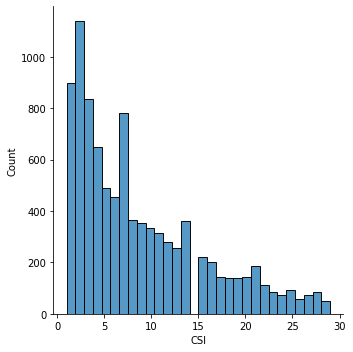

In [49]:
mask = df.CSI != 0
plot_df = df[mask]

mask = df.CSI < 30
plot_df = plot_df[mask]

sns.displot(x="CSI", data=plot_df)

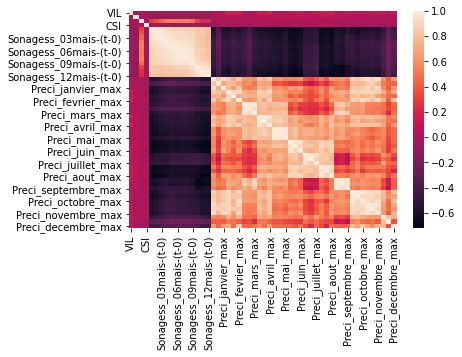

In [11]:
sns.heatmap(df.corr(), annot=False)

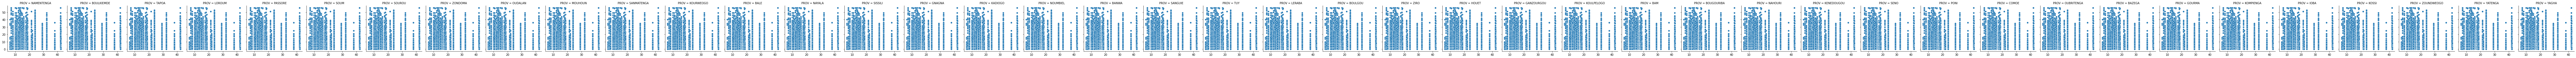

In [41]:
g = sns.FacetGrid(data=df, col="PROV")
g.map(sns.scatterplot, x=df["Preci_octobre_mean"], y=df["CSI"])
# sns.scatterplot(x="Sonagess_01mais-(t-0)", y="CSI", data=df)

# Modeling

---

## SKLEARN imports


In [18]:
#!pip3 install sklearn
# scikit utils functions
## IMPORTS
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn import metrics
# from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_squared_log_error, ma

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [19]:
y = df.CSI
y.shape

(24967,)

In [20]:
X = df.loc[:, ["PROV", "VIL", "MEN", "ANNEE"] + cols[6:]]
X

,PROV,VIL,MEN,ANNEE,Sonagess_01mais-(t-0),Sonagess_02mais-(t-0),Sonagess_03mais-(t-0),Sonagess_04mais-(t-0),Sonagess_05mais-(t-0),Sonagess_06mais-(t-0),Sonagess_07mais-(t-0),Sonagess_08mais-(t-0),Sonagess_09mais-(t-0),Sonagess_10mais-(t-0),Sonagess_11mais-(t-0),Sonagess_12mais-(t-0),Preci_janvier_mean,Preci_janvier_min,Preci_janvier_max,Preci_fevrier_mean,Preci_fevrier_min,Preci_fevrier_max,Preci_mars_mean,Preci_mars_min,Preci_mars_max,Preci_avril_mean,Preci_avril_min,Preci_avril_max,Preci_mai_mean,Preci_mai_min,Preci_mai_max,Preci_juin_mean,Preci_juin_min,Preci_juin_max,Preci_juillet_mean,Preci_juillet_min,Preci_juillet_max,Preci_aout_mean,Preci_aout_min,Preci_aout_max,Preci_septembre_mean,Preci_septembre_min,Preci_septembre_max,Preci_octobre_mean,Preci_octobre_min,Preci_octobre_max,Preci_novembre_mean,Preci_novembre_min,Preci_novembre_max,Preci_decembre_mean,Preci_decembre_min,Preci_decembre_max
0,NAMENTENGA,1,45,2017,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0
1,NAMENTENGA,1,58,2017,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0
2,NAMENTENGA,1,67,2017,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0
3,NAMENTENGA,1,75,2017,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0
4,NAMENTENGA,1,84,2017,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25980,YAGHA,14,39,2018,205.962103,205.581135,216.153228,224.358705,235.299727,233.086427,236.962971,228.678320,226.874075,214.023172,196.311633,185.031138,0.0,0.0,0.0,0.114007,0.0,1.0,2.472657,1.723278,3.272525,12.756782,6.703487,21.748665,31.651584,22.278521,40.927975,103.632518,88.321281,115.141457,155.466487,138.836716,169.372131,206.956324,190.885788,221.006393,131.667950,115.263069,147.500931,8.216859,6.067113,10.412515,0.944625,0.0,1.00000,0.000000,0.0,0.0
25981,YAGHA,14,43,2018,205.962103,205.581135,216.153228,224.358705,235

## Linear / Log Regressors Models

For the linear models the province is encoded as a string, we'll convert it into an int encoding each different province. This way the province information is kept. We'll try with and without it to see if there is any difference.

In [21]:
code = { prov : i for i, prov in enumerate(X.PROV.unique())}
X["PROV_CODE"] = X.PROV.apply(lambda x : code[x]).astype(float)
X.ANNEE = X.ANNEE.astype(float)
X.VIL = X.VIL.astype(float)
X.MEN = X.MEN.astype(float)
X

,PROV,VIL,MEN,ANNEE,Sonagess_01mais-(t-0),Sonagess_02mais-(t-0),Sonagess_03mais-(t-0),Sonagess_04mais-(t-0),Sonagess_05mais-(t-0),Sonagess_06mais-(t-0),Sonagess_07mais-(t-0),Sonagess_08mais-(t-0),Sonagess_09mais-(t-0),Sonagess_10mais-(t-0),Sonagess_11mais-(t-0),Sonagess_12mais-(t-0),Preci_janvier_mean,Preci_janvier_min,Preci_janvier_max,Preci_fevrier_mean,Preci_fevrier_min,Preci_fevrier_max,Preci_mars_mean,Preci_mars_min,Preci_mars_max,Preci_avril_mean,Preci_avril_min,Preci_avril_max,Preci_mai_mean,Preci_mai_min,Preci_mai_max,Preci_juin_mean,Preci_juin_min,Preci_juin_max,Preci_juillet_mean,Preci_juillet_min,Preci_juillet_max,Preci_aout_mean,Preci_aout_min,Preci_aout_max,Preci_septembre_mean,Preci_septembre_min,Preci_septembre_max,Preci_octobre_mean,Preci_octobre_min,Preci_octobre_max,Preci_novembre_mean,Preci_novembre_min,Preci_novembre_max,Preci_decembre_mean,Preci_decembre_min,Preci_decembre_max,PROV_CODE
0,NAMENTENGA,1.0,45.0,2017.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0,0.0
1,NAMENTENGA,1.0,58.0,2017.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0,0.0
2,NAMENTENGA,1.0,67.0,2017.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0,0.0
3,NAMENTENGA,1.0,75.0,2017.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0,0.0
4,NAMENTENGA,1.0,84.0,2017.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25980,YAGHA,14.0,39.0,2018.0,205.962103,205.581135,216.153228,224.358705,235.299727,233.086427,236.962971,228.678320,226.874075,214.023172,196.311633,185.031138,0.0,0.0,0.0,0.114007,0.0,1.0,2.472657,1.723278,3.272525,12.756782,6.703487,21.748665,31.651584,22.278521,40.927975,103.632518,88.321281,115.141457,155.466487,138.836716,169.372131,206.956324,190.885788,221.006393,131.667950,115.263069,147.500931,8.216859,6.067113,10.412515,0.944625,0.0,1.00000,0.000000,0.0,0.0,

In [22]:
## We first design a function to call multiple metrics to judge the performance of our Regressions (Linear & Logistic)
avg = lambda l : sum(l) / len(l)

def compute_score(y_true, y_pred):
    res = {}
    res["r2"] = metrics.r2_score(y_true, y_pred)
    res["mse"] = metrics.mean_squared_error(y_true, y_pred)
    res["rmse"] = metrics.mean_squared_error(y_true, y_pred, squared=False)
    res["mae"] = metrics.mean_absolute_error(y_true, y_pred)
    # res["lmse"] = metrics.mean_squared_log_error(y_true, y_pred)
    return res

def describe_scores(scores):
    for metric in scores[0].keys():
        try:
            scores = [el[metric] for el in scores]
            dic = {"min" : min(scores), "max" : max(scores), "moy" : avg(scores)}
            print("{} : {}".format(metric, dic))
        except Exception as e:
            print(metric, str(e))


In [29]:
## Linear Model
# scores = []
# for i in range(200):
    # X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, 1:], y, test_size=0.2, random_state=i)
    # # print(X_train, X_test)
    # lr = LinearRegression()
    # model = lr.fit(X_train, y_train)

    # y_pred = model.predict(X_test)
    # scores.append(compute_score(y_test, y_pred))
    # scores.append(r2_score(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, 1:], y, test_size=0.2, random_state=i)
# print(X_train, X_test)
lr = LinearRegression()
model = lr.fit(X_train, y_train)

y_pred = model.predict(X_test)
scores = [compute_score(y_test, y_pred)]
scores

[{'mae': 5.63525023172001,
  'mse': 76.8800545168683,
  'r2': 0.07308618347822882,
  'rmse': 8.7681271955229}]

In [30]:
# print(scores)
describe_scores(scores)
# sns.scatterplot(scores)

r2 : {'min': 0.07308618347822882, 'max': 0.07308618347822882, 'moy': 0.07308618347822882}
mse invalid index to scalar variable.
rmse invalid index to scalar variable.
mae invalid index to scalar variable.


Now we'll display how well fitted our model is, we'll plot the data and the regression formula on top of it.

In [57]:
# Before giving data to the Logistic model, we'll need to Normalize this data
X_trans = StandardScaler().fit_transform(X.iloc[:, 1:])

In [59]:
## Logistic Model
scores = []
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=i)
    # print(X_train, X_test)
    lr = LogisticRegression()
    model = lr.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    scores.append(compute_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [60]:
describe_scores(scores)

r2 : {'min': -0.2745772978802743, 'max': -0.2558399607932196, 'moy': -0.26488936108324}
mse invalid index to scalar variable.


# Classification

With an attempt at trying to predict the rCSI, our precision scores were not very satisfying. We'll now jump onto the subject with a different angle, we are now trying to predict to which class a certain houshold belongs to. We first need to determine a rCSI value to seperate household into 2 classes : poverty and extreme poverty.

In [48]:
# We apply a new column "CLASS" in function of the rCSI value fixed
csi_stop_value = 3.0

df["CLASS"] = df.CSI.apply(lambda x: 0 if x < csi_stop_value else 1)
df

,PROV,COM,VIL,MEN,ANNEE,CSI,Sonagess_01mais-(t-0),Sonagess_02mais-(t-0),Sonagess_03mais-(t-0),Sonagess_04mais-(t-0),Sonagess_05mais-(t-0),Sonagess_06mais-(t-0),Sonagess_07mais-(t-0),Sonagess_08mais-(t-0),Sonagess_09mais-(t-0),Sonagess_10mais-(t-0),Sonagess_11mais-(t-0),Sonagess_12mais-(t-0),Preci_janvier_mean,Preci_janvier_min,Preci_janvier_max,Preci_fevrier_mean,Preci_fevrier_min,Preci_fevrier_max,Preci_mars_mean,Preci_mars_min,Preci_mars_max,Preci_avril_mean,Preci_avril_min,Preci_avril_max,Preci_mai_mean,Preci_mai_min,Preci_mai_max,Preci_juin_mean,Preci_juin_min,Preci_juin_max,Preci_juillet_mean,Preci_juillet_min,Preci_juillet_max,Preci_aout_mean,Preci_aout_min,Preci_aout_max,Preci_septembre_mean,Preci_septembre_min,Preci_septembre_max,Preci_octobre_mean,Preci_octobre_min,Preci_octobre_max,Preci_novembre_mean,Preci_novembre_min,Preci_novembre_max,Preci_decembre_mean,Preci_decembre_min,Preci_decembre_max,CLASS
0,NAMENTENGA,BOALA,1,45,2017,0.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0,0
1,NAMENTENGA,BOALA,1,58,2017,17.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0,1
2,NAMENTENGA,BOALA,1,67,2017,0.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0,0
3,NAMENTENGA,BOALA,1,75,2017,0.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0,0
4,NAMENTENGA,BOALA,1,84,2017,0.0,179.172252,181.356212,185.809856,190.787517,188.011398,191.833223,194.144260,203.511143,208.536220,209.241184,200.284048,197.728368,0.0,0.0,0.0,0.338347,0.0,1.0,2.742242,2.070759,4.894630,23.595474,10.777817,34.442890,49.244430,31.246885,70.409164,132.226001,109.778351,146.893341,192.778042,152.420837,228.489380,236.076535,208.929626,253.146072,129.171617,97.156929,159.500290,9.977286,8.016452,12.367086,0.725630,0.0,1.55807,0.410648,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25980,YAGHA,BOUNDORE,14,39,2018,7.0,205.962103,205.581135,216.153228,224.358705,235.299727,233.086427,236.962971,228.678320,226.874075,214.023172,196.311633,185.031138,0.0,0.0,0.0,0.114007,0.0,1.0,2.472657,1.723278,3.272525,12.756782,6.703487,21.748665,31.651584,22.278521,40.927975,103.632518,88.321281,115.141457,155.466487,138.836716,169.372131,206.956324,190.885788,221.006393,131.667950,115.263069,147.500931,8.216859,6.067113,10.412515,0.944625

In [55]:
mask = df.CLASS == 0
print("{} housholds have a rCSI strictly inferior to {}".format(df[mask].shape, csi_stop_value))
print("{} housholds have a rCSI superior or equal to {}".format(df[mask != True].shape, csi_stop_value))

(16783, 55) housholds have a rCSI strictly inferior to 3.0
(8184, 55) housholds have a rCSI superior or equal to 3.0


<Figure size 1440x1080 with 0 Axes>

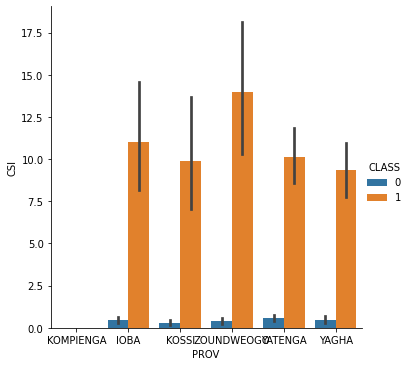

In [61]:
plt.figure(figsize=(20, 15))
g = sns.catplot(
    data=df.iloc[-500:, :], kind="bar",
    x="PROV", y="CSI", hue="CLASS"#,
)
#     ci="sd", palette="dark", alpha=.6, height=6
# )
